### Importing some required libraries for the work

In [1]:
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score

### Importing the data from the to a pandas data frame

In [19]:
df = pandas.read_csv("data.csv")
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### Investigating the data columns

In [20]:
print(df.columns)
df.shape

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


(569, 33)

### Make the labels readable for the system

In [21]:
df = df[df.columns[1:32]]
df.shape

(569, 31)

In [37]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [38]:
d = {'M': 1, 'B': 0}
df['diagnosis'] = df['diagnosis'].map(d)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Drawing heat map for the data

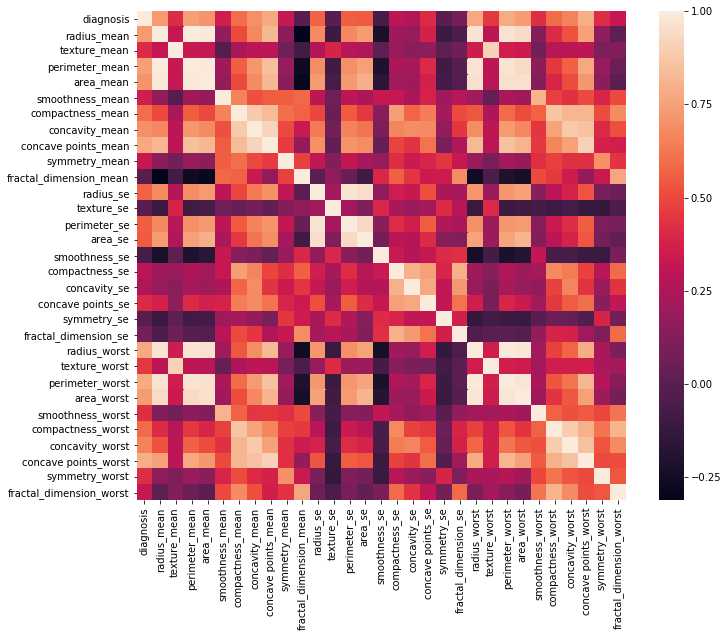

In [39]:
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=1 , square = True)
plt.show()

### Preparing data and divide it into target and features

In [71]:
features = df.columns[1:31]
target = 'diagnosis'

print(target)
print(features)


diagnosis
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Scaling the data

In [45]:
df_scale = df
df_scale[features] = (df[features] - df[features].mean()) / (df[features].max() - df[features].min())
df_scale.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     0.182815     -0.301307        0.213053   0.146813   
1          1     0.304923     -0.051392        0.282848   0.284671   
2          1     0.263274      0.066295        0.262808   0.232497   
3          1    -0.128132      0.036874       -0.099434  -0.114014   
4          1     0.291671     -0.167388        0.298051   0.272369   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.198968          0.531437        0.495081             0.487976   
1        -0.104905         -0.078833       -0.004450             0.105621   
2         0.119524          0.170416        0.254453             0.392549   
3         0.416536          0.550761        0.357546             0.279726   
4         0.035567          0.087292        0.255859             0.275253   

   symmetry_mean           ...             radius_worst  texture_worst  \
0       0.306758           ...                 0.324113      -0.222474   
1       0.000193           ...                 0.310239      -0.060427   
2       0.129991           ...                 0.259723      -0.003924   
3       0.396657           ...                -0.048353       0.021929   
4      -0.001323           ...                 0.223081      -0.240065   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         0.385173    0.279792          0.196998           0.399079   
1         0.256680    0.264308         -0.056585          -0.065649   
2         0.225304    0.203602          0.079452           0.165163   
3        -0.041791   -0.076898          0.511335           0.593799   
4         0.223810    0.170669          0.033226          -0.047797   

   concavity_worst  concave points_worst  symmetry_worst  \
0         0.351207              0.518192        0.335156   
1        -0.024432              0.245339       -0.029717   
2         0.142341              0.441216        0.140399   
3         0.331239              0.491044        0.736693   
4         0.102086              0.164583       -0.105806   

   fractal_dimension_worst  
0                 0.229268  
1                 0.033282  
2                 0.023837  
3                 0.584115  
4                -0.047001  

[5 rows x 31 columns]

### Splitting the data into test and Train

In [47]:
train = df_scale.sample(frac=0.8, random_state=1)

test = df_scale.loc[~df_scale.index.isin(train.index)]

print(train.shape)
print(test.shape)

(455, 31)
(114, 31)


### Using a deep neural network to solve it


In [124]:
X_train = train[features]
y_train = train[target]
X_test = test[features]

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(14, activation=tf.nn.relu),
  tf.keras.layers.Dense(7, activation=tf.nn.relu),
  tf.keras.layers.Dense(3, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train.values, y_train.values, epochs=40, batch_size=50)
test_acc = model.evaluate(test[features].values, test[target].values)
print(1-test_acc)

Epoch 1/40
455/455 [==============================] - 12s 26ms/sample - loss: 0.2465
Epoch 2/40
455/455 [==============================] - 0s 409us/sample - loss: 0.2397
Epoch 3/40
455/455 [==============================] - 0s 374us/sample - loss: 0.2290
Epoch 4/40
455/455 [==============================] - 0s 468us/sample - loss: 0.2165
Epoch 5/40
455/455 [==============================] - 0s 422us/sample - loss: 0.2031
Epoch 6/40
455/455 [==============================] - 0s 457us/sample - loss: 0.1885
Epoch 7/40
455/455 [==============================] - 0s 304us/sample - loss: 0.1732
Epoch 8/40
455/455 [==============================] - 0s 363us/sample - loss: 0.1577
Epoch 9/40
455/455 [==============================] - 0s 369us/sample - loss: 0.1423
Epoch 10/40
455/455 [==============================] - 0s 343us/sample - loss: 0.1277
Epoch 11/40
455/455 [==============================] - 0s 297us/sample - loss: 0.1139
Epoch 12/40
455/455 [==============================] - 0s 277us

### Trying xgbaoost

In [94]:
import xgboost
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pred = [round(value) for value in y_pred]
print(mean_squared_error(pred,test[target]))
print(accuracy_score(test[target], pred))
print(classification_report(test[target], pred))

0.017543859649122806
0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.96      0.98        45

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Trying Support vector with linear Kernel

In [113]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(train[features],train[target])
pred = svc.predict(test[features])
pred[pred>0.5] = 1
pred[pred<0.5] = 0
print(mean_squared_error(pred,test[target]))
print(accuracy_score(test[target], pred))
print(classification_report(test[target], pred))

0.02631578947368421
0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Testing KNN after investigating different neighbors numbers and 3 obtained best results


In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred = [round(value) for value in pred]
print(mean_squared_error(pred,test[target]))
print(accuracy_score(test[target], pred))
print('------------===========-------------')

0.017543859649122806
0.9824561403508771
------------===========-------------


# Conclusion after trying three algorithms the result 

## SVM got 97.3% Accuracy

## Xgboost 98.2% Accuracy

## KNN        98.2% Accuracy

## DNN         98.1% Accuracy 